In [21]:
import numpy as np
import utils.helper_functions as support
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import json
%matplotlib inline
from geopy import distance


In [27]:
locations = open('data.json')
data = json.load(locations)
raw_point_coords ={}
for i in data['features']:
    raw_point_coords[i['properties']['point-id']] = tuple(i['geometry']['coordinates'])

coordinate_dict = {}
coordinate_dict[0] = (12.922963500022886, 52.42706852497485)
for x in sorted(raw_point_coords.items(),key = lambda x :x[0]):
    coordinate_dict[x[0]]=x[1]

In [28]:
df = pd.DataFrame(coordinate_dict,index=['longitude','latitude']).transpose()
df

,longitude,latitude
0,12.922964,52.427069
1,12.924417,52.426643
2,12.924624,52.426676
3,12.924825,52.426731
4,12.924342,52.427059
5,12.924109,52.427000
6,12.924463,52.426764
7,12.924482,52.426911
8,12.924538,52.427088
9,12.922964,52.426666


In [29]:
BBox=((df.longitude.min(), df.longitude.max(),
        df.latitude.min(), df.latitude.max() ))
BBox

(12.922963500022886, 12.924824953079224, 52.42556852497485, 52.42708796038019)

In [30]:
ruh_m = plt.imread('map.png')

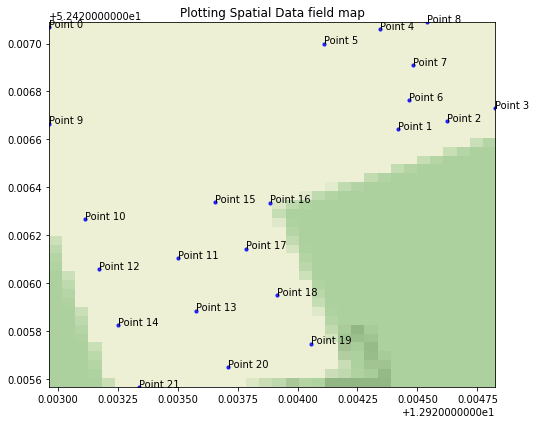

In [31]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.8, c='b', s=10)
ax.set_title('Plotting Spatial Data field map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
for point in df.index:
    ax.annotate(f'Point {point}', (df['longitude'][point],df['latitude'][point]))

In [32]:
distance_dict={}
for current_point in range(0,len(coordinate_dict.items())):
    distance_dict[current_point] = {}
    for y in range(0,len(coordinate_dict.items())):
        if y!= current_point:
            distance_dict[current_point][y] = distance.distance(coordinate_dict[current_point],coordinate_dict[y]).km

In [48]:
distance_df = pd.DataFrame(distance_dict)
#distance_df

In [34]:
minimum_list =[]
for x in distance_df:
    minimum_list.append(distance_df[x].min())
    
minimums = pd.DataFrame(minimum_list)
standard_distance = minimums[0].std()+1*minimums.mean()[0]


In [47]:
distance_df.fillna(float('inf'))
# for x in distance_df:
#     if(distance_df[x]<standard_distance):
#         print(f'point: {x}, neighbours:{distance_df[distance_df<standard_distance]}')

neighbours = distance_df[distance_df<1*standard_distance]
#neighbours


In [45]:
import math 
import networkx as nx
neighbour_dict={}
for x in neighbours:
    neighbour_dict[x]=[]
    counter = 0
    for y in neighbours[x]:
        counter += 1
        if not math.isnan(y):
            neighbour_dict[x].append((0,y)) if counter==22 else neighbour_dict[x].append((counter,y)) 

In [42]:
# for x in neighbour_dict:
#     if not neighbour_dict[x]:
#         neighbour_dict[x].append((distance_df[x].idxmin(),distance_df[x].min()))


In [46]:
distance_multiplier = 1.1

for point in neighbour_dict:
    while len(neighbour_dict[point])<2:
        distance_multiplier+=0.1
        neighbours = distance_df[distance_df[point]<distance_multiplier*standard_distance]
        if not neighbours.empty:
            for close_point in neighbours[point]:
                if close_point != point:
                    if (support.find_key_by_value(distance_dict[point],close_point),close_point) not in neighbour_dict[point]:
                        neighbour_dict[point].append((support.find_key_by_value(distance_dict[point],close_point),close_point))
    distance_multiplier = 1.1



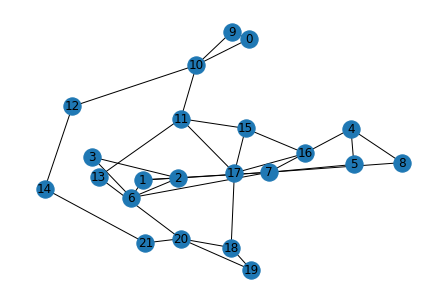

In [44]:
G = nx.Graph()
for x in neighbour_dict:
    for neighbour in neighbour_dict[x]:
        G.add_edge(x,neighbour[0],weight=neighbour[1])

nx.draw(G,with_labels = True)
